**Objective:**

The objective of this Project is to analyze a food service dataset to gain insights into operational efficiency and food waste management. The dataset consists of variables such as the number of meals served, kitchen sta, environmental conditions (temperature and humidity), and food waste. Our goal is to explore this data, clean it, visualize key patterns, and derive actionable insights to optimize operations.

# **1. Uploading the food dataset.**


In [ ]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading the dataset
df = pd.read_csv("/content/sample_data/Food data.csv")
display(df.head())
print(df.shape)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


(1822, 11)


# **2. Data Cleaning**

In [ ]:
# Dropping the 'ID' column as date is the unique identifier.
df.drop(columns=['ID'], inplace=True)
df.head(5)

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [ ]:
# Finding the duplicate rows.
df.duplicated().sum()

np.int64(768)

In [ ]:
# Removing the duplicate rows.
df.drop_duplicates()

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...
1783,10/1/2022,437.0,19,18.566337,NaN,5,0,19.939391,NaN,MEAT
1788,3/29/2024,198.0,9,15.638533,77.852842,4,0,24.294393,EXPERT,GRAINS
1792,4/11/2024,182.0,9,11.432006,87.690800,3,0,23.823100,EXPERT,GRAINS
1793,9/1/2022,302.0,18,25.138454,65.759331,3,1,12.473368,NaN,MEAT


In [ ]:
# Cheking for the missing values and their percentage in each column.
print("Missing values in each column:\n",df.isnull().sum())
print("-------------------")
missing_values = df.isnull().sum()
missing_percentage = (missing_values/len(df))*100
print("Missing Values Percenatge:\n",missing_percentage)

Missing values in each column:
 date                  0
meals_served         32
kitchen_staff        18
temperature_C         0
humidity_percent     16
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    337
waste_category       21
dtype: int64
-------------------
Missing Values Percenatge:
 date                 0.000000
meals_served         1.756312
kitchen_staff        0.987925
temperature_C        0.000000
humidity_percent     0.878156
day_of_week          0.000000
special_event        0.000000
past_waste_kg        0.878156
staff_experience    18.496158
waste_category       1.152580
dtype: float64


In [ ]:
# Checking the categorial columns and handling their missing values.
for col in df:
  print(f"\nColumn {col}: ")
  print(df[col].nunique())
  print(df[col].value_counts())
  print("---------------------------------")


Column date: 
867
date
2/2/2022     4
1/11/2022    4
1/27/2022    4
2/14/2022    4
1/6/2022     4
            ..
4/2/2024     2
9/4/2023     2
1/17/2024    2
3/20/2024    2
6/27/2022    2
Name: count, Length: 867, dtype: int64
---------------------------------

Column meals_served: 
373
meals_served
259.0     14
352.0     14
485.0     14
291.0     14
198.0     13
          ..
117.0      2
4680.0     1
284.0      1
102.0      1
2080.0     1
Name: count, Length: 373, dtype: int64
---------------------------------

Column kitchen_staff: 
17
kitchen_staff
12        143
5         138
10        130
13        127
9         127
15        123
18        121
14        117
7         117
11        116
19        116
6         113
17        108
16        103
8          99
ten         4
eleven      2
Name: count, dtype: int64
---------------------------------

Column temperature_C: 
892
temperature_C
-10.000000    24
 60.000000    18
 34.418131     2
 20.567228     2
 31.145476     2
              ..

In [ ]:
# Replacing non-numeric entries with numeric.

# Changing dtype of 'kitchen_staff' into str to make 'ten' and 'eleven' count
# and then converting it into numeric integers.
df['kitchen_staff']=df['kitchen_staff'].astype(str).str.strip().replace({'ten':'10','eleven':'11'})
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce').astype('Int64')
print(df['kitchen_staff'].value_counts())
print("-------------------------------------------")

# The 'special_event' doesn't have any missing values so it can be directly
# converted back into int.
df['special_event'] =df['special_event'].astype(str).str.strip().replace({'One':1}).astype(int)
print(df['special_event'].value_counts())
print("-------------------------------------------")

# Capitalizing the first letter each category in 'staff_experience' to make
# 'intermediate' as one.
df['staff_experience']=df['staff_experience'].str.capitalize()
print(df['staff_experience'].value_counts())
print("-------------------------------------------")

# Lowering the each category in 'waste_category' to make similar cat as one.
df['waste_category']=df['waste_category'].str.lower()
print(df['waste_category'].value_counts())
print("-------------------------------------------")
# Checking the changed data types.
print(df.dtypes)

kitchen_staff
12    143
5     138
10    134
13    127
9     127
15    123
18    121
11    118
14    117
7     117
19    116
6     113
17    108
16    103
8      99
Name: count, dtype: Int64
-------------------------------------------
special_event
0    1666
1     156
Name: count, dtype: int64
-------------------------------------------
staff_experience
Intermediate    734
Beginner        381
Expert          346
Pro              24
Name: count, dtype: int64
-------------------------------------------
waste_category
meat          754
dairy         351
vegetables    350
grains        317
barley         15
wheat          14
Name: count, dtype: int64
-------------------------------------------
date                 object
meals_served        float64
kitchen_staff         Int64
temperature_C       float64
humidity_percent    float64
day_of_week           int64
special_event         int64
past_waste_kg       float64
staff_experience     object
waste_category       object
dtype: object


In [ ]:
# Imputing the missing values in categorical columns with mode.
miss_val_categ_columns = ["kitchen_staff","staff_experience","waste_category"]
for col in miss_val_categ_columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

/tmp/ipython-input-3848904168.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


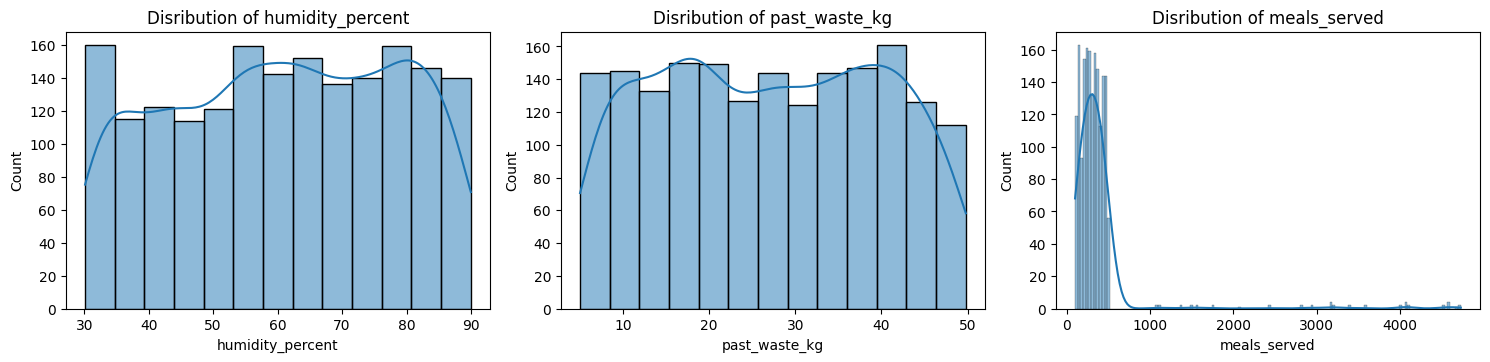

In [ ]:
# For numerical columns we will first make histograms to check the distribution
# of the data.
plt.figure(figsize=(15,10))
miss_val_num_columns = ["humidity_percent","past_waste_kg","meals_served"]
for i,col in enumerate(miss_val_num_columns):
  plt.subplot(3,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(f"Disribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# From the above histograms the 'humidity_percent' and 'past_waste_kg' are
# almost normally disribted while 'meals_served' is skewed, so we will impute
# the above two columns with mean and 'meals_served' with median.
numerical_cols_mean = ['humidity_percent', 'past_waste_kg']
for col in numerical_cols_mean:
    df[col].fillna(df[col].mean(), inplace=True)

df['meals_served'].fillna(df['meals_served'].median(), inplace=True)

/tmp/ipython-input-561591335.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-561591335.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
# Changing the date format.
df['date']=pd.to_datetime(df['date'], errors='coerce')

# **3**. **Summary Statistics of the continuous columns and handling outliers.**

In [ ]:
numerical_cont_columns = ['meals_served','temperature_C','humidity_percent','past_waste_kg']
df[numerical_cont_columns].describe()

,meals_served,temperature_C,humidity_percent,past_waste_kg
count,1822.000000,1822.000000,1822.000000,1822.000000
mean,372.327113,22.189280,60.791257,26.997534
std,490.505492,8.919939,17.249947,12.735569
min,100.000000,-10.372207,30.121111,5.008394
25%,212.250000,15.684259,46.137537,16.148956
50%,306.000000,22.115040,61.514385,26.997534
75%,405.750000,28.807494,75.755784,37.978663
max,4730.000000,60.000000,89.982828,49.803703


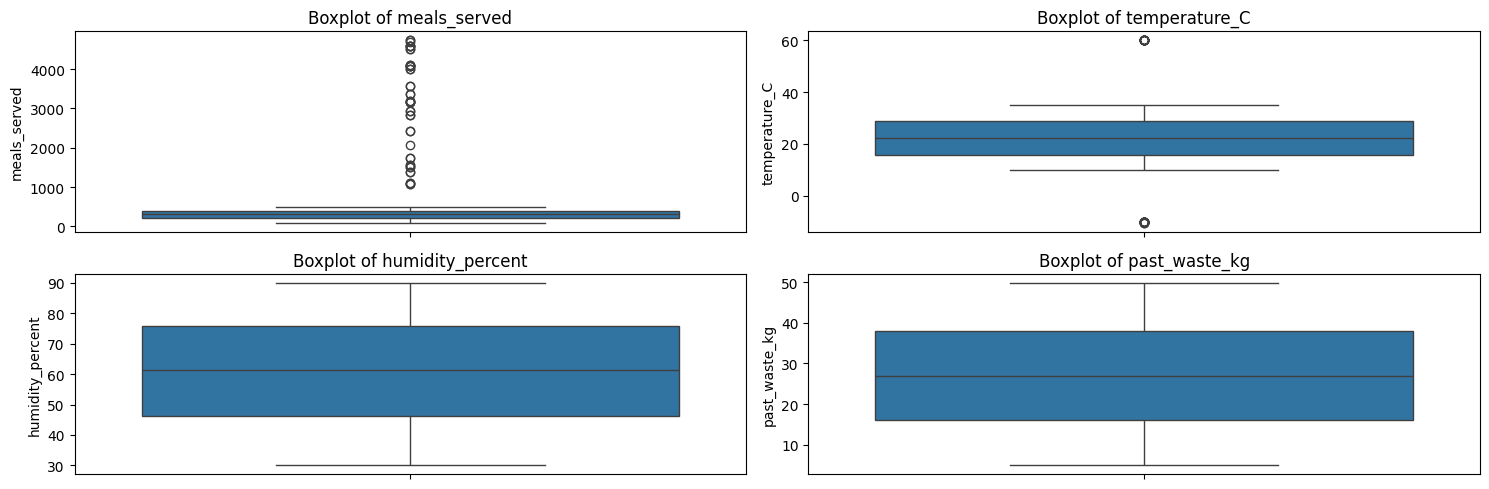

In [ ]:
# Handling Outliers

# Boxplot of the of the numeric continuous columns to check the
# outliers.
plt.figure(figsize=(15,5))
for i,col in enumerate(numerical_cont_columns):
  plt.subplot(2,2,i+1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# From the above plots we can see there are outliers in some columns, so we will
# first confirm the outliers with the iqr method.
for col in numerical_cont_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  outliers = df[(df[col]<lower_bound)|(df[col]>upper_bound)]
  print(f'\nThe number of outliers in {col} are {len(outliers)}')
  display(outliers[col].head(3))


The number of outliers in meals_served are 46


,meals_served
16,1560.0
21,1110.0
129,2930.0



The number of outliers in temperature_C are 44


,temperature_C
12,-10.372207
102,-10.000000
238,-10.000000



The number of outliers in humidity_percent are 0


,humidity_percent



The number of outliers in past_waste_kg are 0


,past_waste_kg


In [ ]:
# Now we will Cap the outliers with the lower_bound and upper_bound values.
for col in numerical_cont_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  df[col] = df[col].clip(upper=upper_bound,lower=lower_bound)

# **4. Visualizing Distribution.**

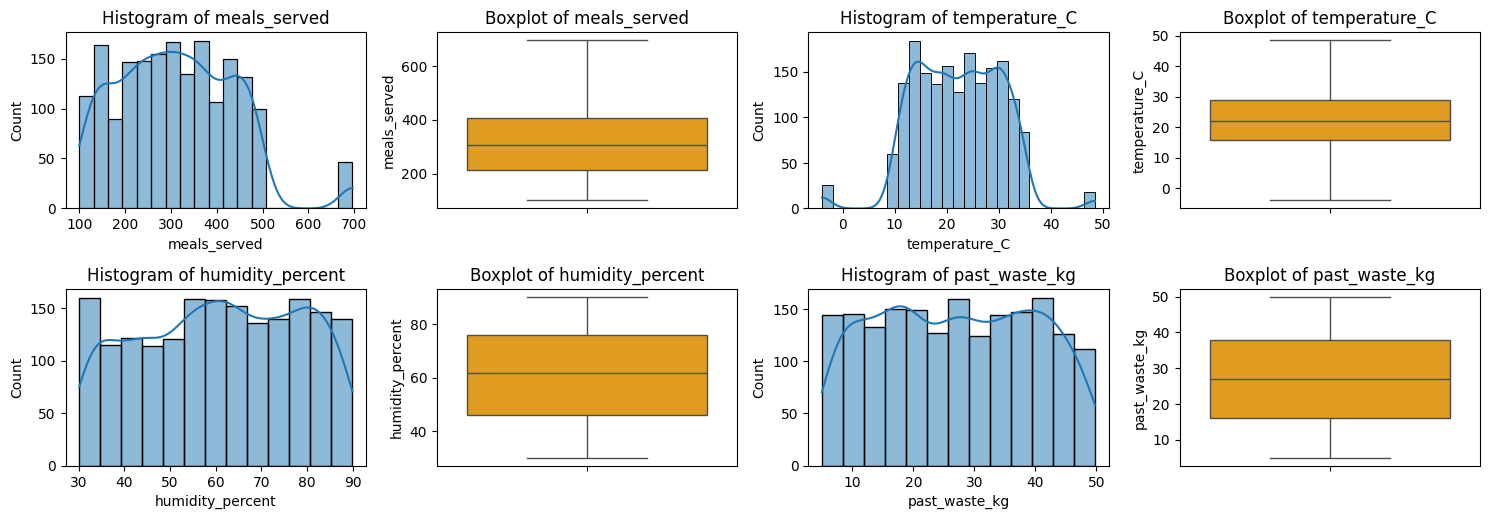

In [ ]:
# Histograms and Boxplots to visualiza the numeric columns.
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cont_columns):
  plt.subplot(4,4,2*i+1)
  sns.histplot(df[col],kde=True)
  plt.title(f'Histogram of {col}')
  plt.subplot(4,4,2*i+2)
  sns.boxplot(y=df[col],color='orange')
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

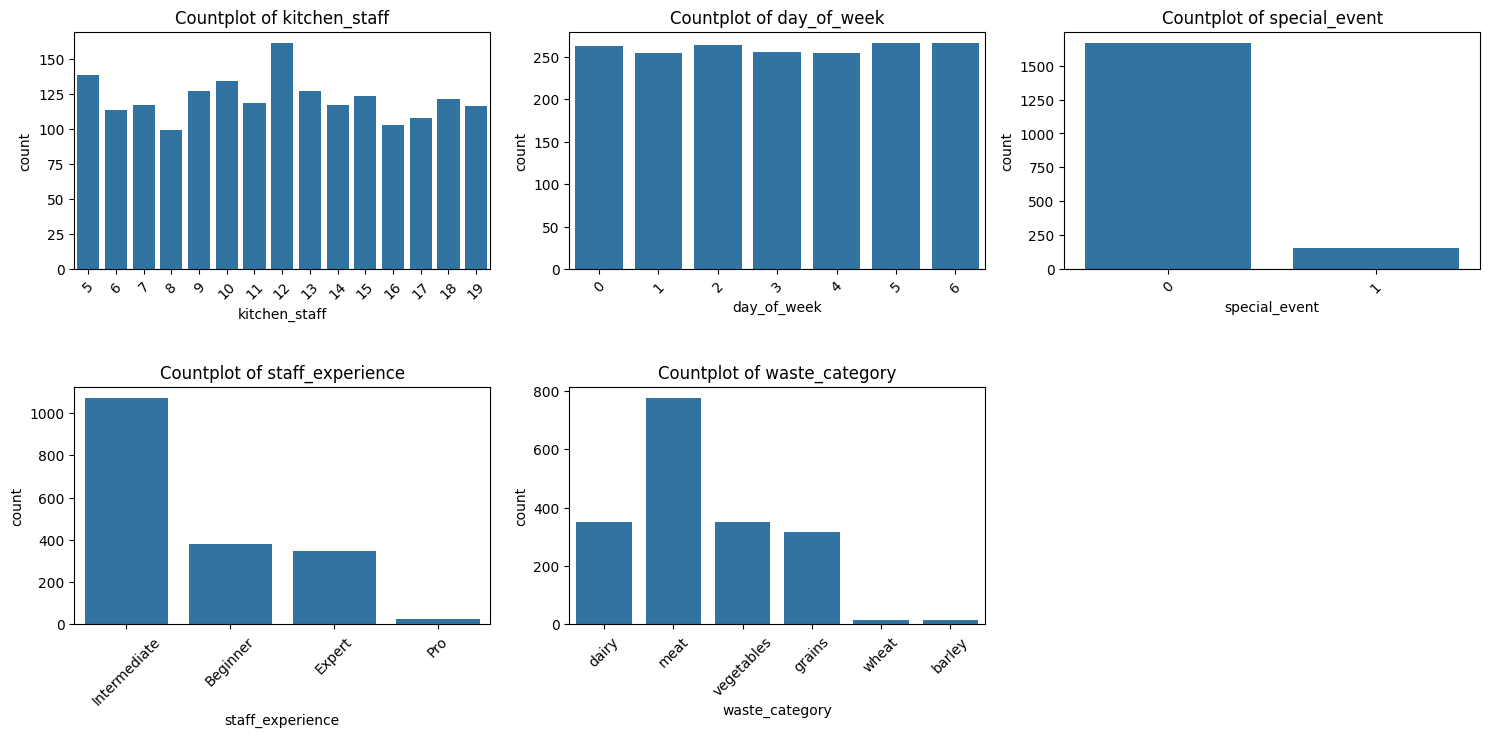

In [ ]:
# Countplots to visualize categorical columns.
cat_columns = ['kitchen_staff','day_of_week','special_event','staff_experience','waste_category']
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_columns):
  plt.subplot(3,3,i+1)
  sns.countplot(x=df[col])
  plt.title(f'Countplot of {col}')
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis of the numeric columns.
df.corr(numeric_only=True)

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg
meals_served,1.000000,-0.033402,-0.013666,-0.037105,-0.001317,0.006669,0.020958
kitchen_staff,-0.033402,1.000000,-0.019688,-0.016049,0.034081,0.001712,-0.082244
temperature_C,-0.013666,-0.019688,1.000000,-0.005471,0.023725,-0.003258,-0.020392
humidity_percent,-0.037105,-0.016049,-0.005471,1.000000,0.017706,0.017935,0.014946
day_of_week,-0.001317,0.034081,0.023725,0.017706,1.000000,-0.041240,0.000465
special_event,0.006669,0.001712,-0.003258,0.017935,-0.041240,1.000000,0.006662
past_waste_kg,0.020958,-0.082244,-0.020392,0.014946,0.000465,0.006662,1.000000


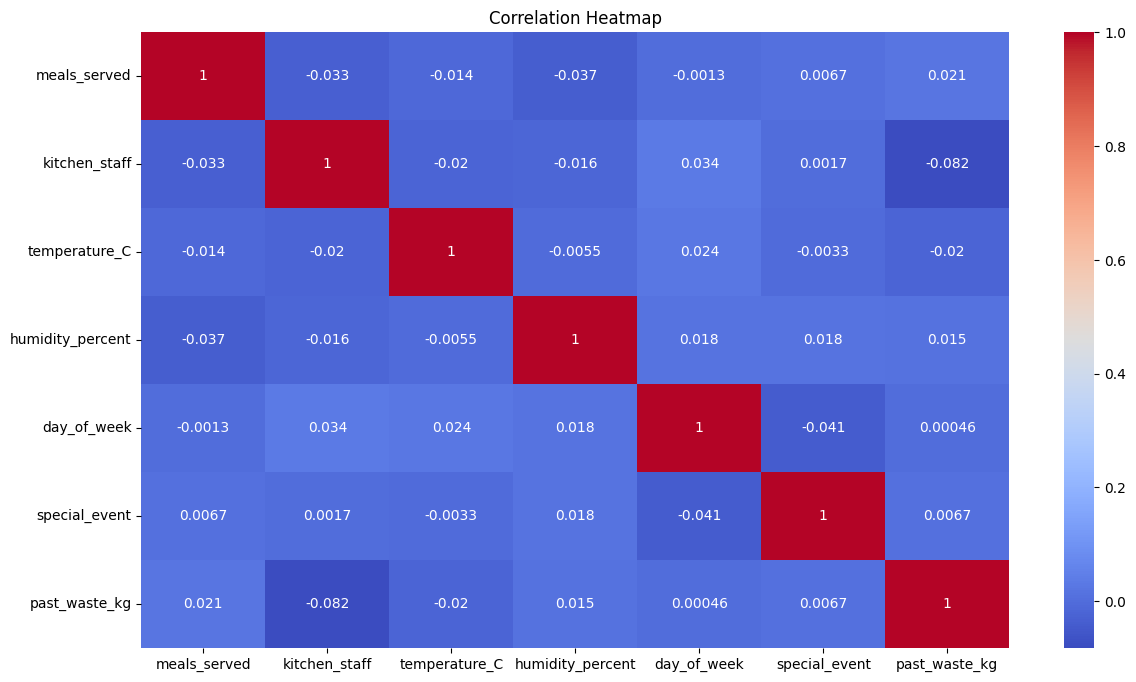

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title(f'Correlation Heatmap')
plt.show()# Correlation Analysis of the numeric columns.

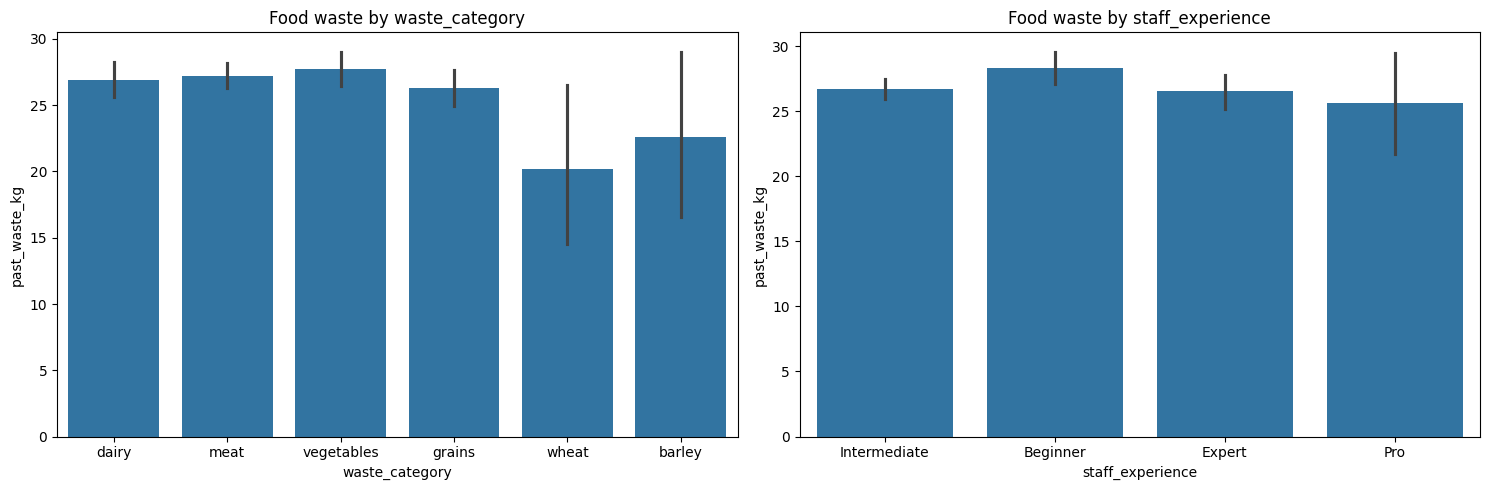

In [ ]:
# Barplot for comparing food waste across waste_category and staff_experience.
cat_features = ['waste_category','staff_experience']
plt.figure(figsize=(15,5))
for i,col in enumerate(cat_features):
  plt.subplot(1,2,i+1)
  sns.barplot(x=df[col], y=df['past_waste_kg'])
  plt.title(f'Food waste by {col}')
plt.tight_layout()
plt.show()

# **5. Key Insights and Recommendations**

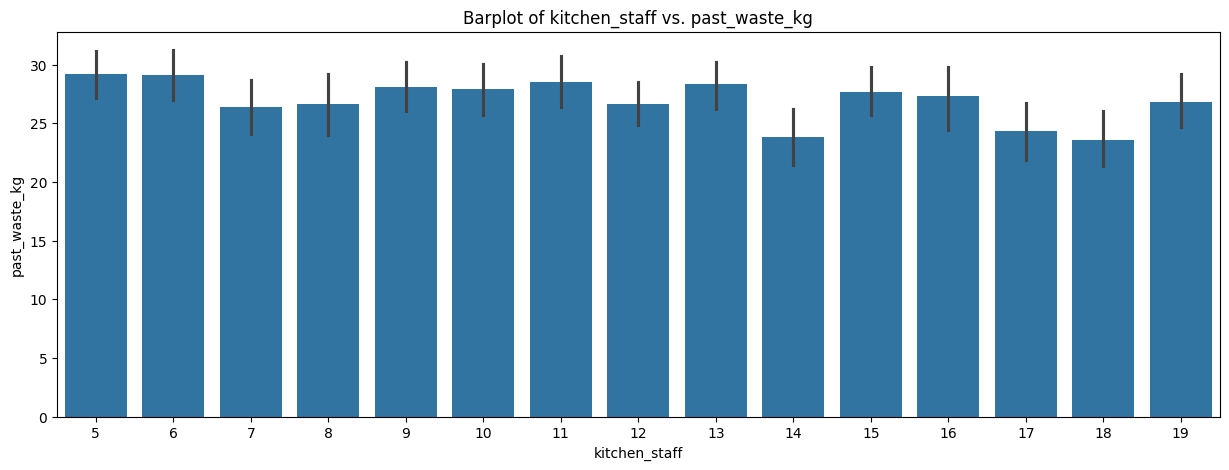

In [ ]:
# Staffing optimization.
plt.figure(figsize=(15,5))
sns.barplot(x=df['kitchen_staff'],y=df['past_waste_kg'])
plt.title(f"Barplot of kitchen_staff vs. past_waste_kg")
plt.show()

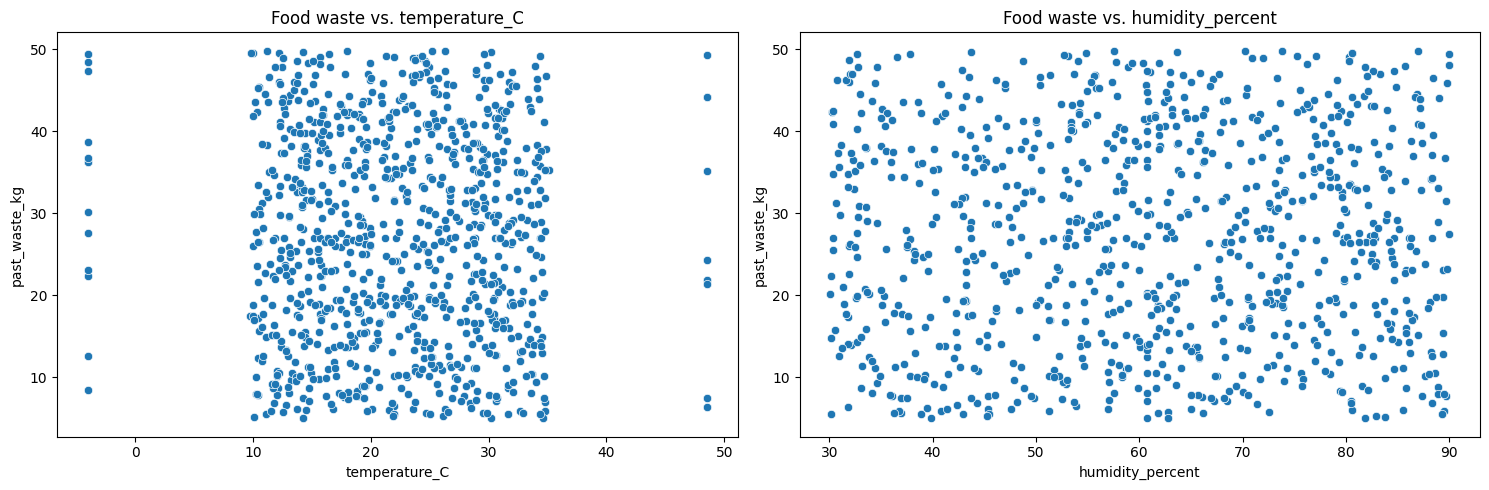

In [ ]:
# Environmental factors.
env_factors = ['temperature_C','humidity_percent']
plt.figure(figsize=(15,5))
for i,col in enumerate(env_factors):
  plt.subplot(1,2,i+1)
  sns.scatterplot(x=df[col],y=df['past_waste_kg'])
  plt.title(f'Food waste vs. {col}')
plt.tight_layout()
plt.show()

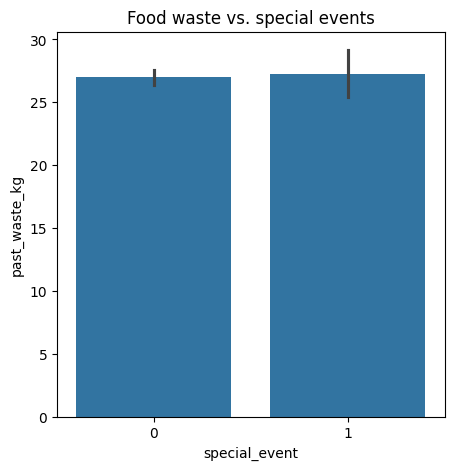

In [ ]:
# Event Management
plt.figure(figsize=(5,5))
sns.barplot(x=df['special_event'],y=df['past_waste_kg'])
plt.title(f'Food waste vs. special events')
plt.show()